# Defining the Business Problem  

An enterprise is concerned about high customer churn, which is a significant issue as it directly impacts the profitability of the company. Customer churn is a key performance indicator (KPI) that measures the percentage of customers who have discontinued their association with the company over a specific period. The company must retain its customers as acquiring new customers is more expensive and time-consuming than retaining existing ones. Identifying the key factors that contribute to high churn will allow the company to address those issues and increase customer retention.

# Data Analysis 

In [1]:
#We import the packages to use 
import pandas as pd 
import numpy as np
import random 
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint
from sklearn.metrics import plot_confusion_matrix



In [2]:
# Read file
data = pd.read_csv("./A2.csv")
data

,Unnamed: 0,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Churn,Geography,CreditScore,Surname,EstimatedSalary,MonthlyCharges,customerID,Dependents,PaymentMethod,Charge
0,0,Female,0.0,Yes,72.0,Yes,No,Fiber optic,Yes,Yes,...,No,Germany,602.0,Klein,45038.29,108.30,6519-ZHPXP,Yes,Bank transfer (automatic),108.30
1,1,Male,0.0,Yes,30.0,Yes,Yes,DSL,No,No,...,No,Germany,776.0,Lung,89893.60,49.90,1958-RNRKS,No,Electronic check,49.90
2,2,Male,0.0,Yes,49.0,No,No phone service,DSL,Yes,No,...,No,Germany,709.0,Lucciano,11.58,39.20,7989-AWGEH,Yes,Electronic check,39.20
3,3,Female,1.0,Yes,25.0,Yes,Yes,DSL,Yes,No,...,No,France,788.0,O'Brien,116978.19,69.50,6575-SUVOI,No,Credit card (automatic),69.50
4,4,Female,1.0,Yes,72.0,Yes,Yes,Fiber optic,Yes,Yes,...,No,Germany,733.0,Medvedeva,177994.81,114.65,1779-PWPMG,No,Bank transfer (automatic),114.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7995,Female,1.0,No,14.0,No,No phone service,DSL,Yes,No,...,No,Germany,714.0,Y?,7571.51,39.70,9796-MVYXX,No,Mailed check,39.70
7996,7996,Female,0.0,Yes,1.0,Yes,No,No,No internet service,No internet service,...,No,France,664.0,Napolitano,15304.08,20.65,2480-JZOSN,No,Mailed check,20.65
7997,7997,Female,0.0,Yes,2.0,No,No phone service,DSL,No,Yes,...,No,Spain,706.0,Morrison,75732.25,30.25,7389-KBFIT,Yes,Mailed check,30.25
7998,7998,Male,1.0,No,1.0,Yes,No,DSL,No,No,...,Yes,Spain,700.0,Obidimkpa,45424.13,45.10,8080-DDEMJ,No,Electronic check,45.10


## Data Cleaning

In [3]:
# A lot of object datatypes, first column is index (gender), customerID is not required, surname is irrelevant
data.info() 

# Drop it 
data = data.drop(columns=["Unnamed: 0", "customerID", "Surname"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8000 non-null   int64  
 1   gender            7938 non-null   object 
 2   SeniorCitizen     7954 non-null   float64
 3   Partner           7952 non-null   object 
 4   tenure            7938 non-null   float64
 5   PhoneService      7947 non-null   object 
 6   MultipleLines     7933 non-null   object 
 7   InternetService   7944 non-null   object 
 8   OnlineSecurity    7941 non-null   object 
 9   OnlineBackup      7960 non-null   object 
 10  DeviceProtection  7953 non-null   object 
 11  TechSupport       7954 non-null   object 
 12  StreamingTV       7950 non-null   object 
 13  StreamingMovies   7947 non-null   object 
 14  Contract          7952 non-null   object 
 15  PaperlessBilling  7952 non-null   object 
 16  TotalCharges      7961 non-null   object 


In [4]:
data.describe(include='all') # get some general insights on descriptive statistics
# A lot of potential boolean collumns, many have 3 unique values, it is important to look into it as some might be outliers

,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,TotalCharges,Churn,Geography,CreditScore,EstimatedSalary,MonthlyCharges,Dependents,PaymentMethod,Charge
count,7938,7954.000000,7952,7938.000000,7947,7933,7944,7941,7960,7953,...,7952,7961,7934,7948,7938.000000,7951.000000,7968.000000,8000,8000,8000.000000
unique,2,NaN,2,NaN,2,3,3,3,3,3,...,2,6504,2,3,NaN,NaN,NaN,2,4,NaN
top,Male,NaN,No,NaN,Yes,No,Fiber optic,No,No,No,...,Yes,,No,France,NaN,NaN,NaN,No,Electronic check,NaN
freq,4013,NaN,4111,NaN,7184,3811,3524,3953,3483,3502,...,4718,14,5839,3982,NaN,NaN,NaN,5588,2661,NaN
mean,NaN,0.162308,NaN,32.387377,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,649.607332,100378.433402,65.009281,NaN,NaN,65.020300
std,NaN,0.368757,NaN,24.592283,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,97.303283,57614.567826,30.075140,NaN,NaN,30.067887
min,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,350.000000,11.580000,18.250000,NaN,NaN,18.250000
25%,NaN,0.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,581.000000,50778.955000,35.800000,NaN,NaN,35.800000
50%,NaN,0.000000,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,651.000000,100556.980000,70.550000,NaN,NaN,70.550000
75%,NaN,0.000000,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,717.000000,149400.515000,89.900000,NaN,NaN,89.900000


In [5]:
# Count all nulls 
data.isnull().sum(axis = 0)
# Could try to just drop the rows with nulls but that could reduce the dataset too much, first lets look closer

gender              62
SeniorCitizen       46
Partner             48
tenure              62
PhoneService        53
MultipleLines       67
InternetService     56
OnlineSecurity      59
OnlineBackup        40
DeviceProtection    47
TechSupport         46
StreamingTV         50
StreamingMovies     53
Contract            48
PaperlessBilling    48
TotalCharges        39
Churn               66
Geography           52
CreditScore         62
EstimatedSalary     49
MonthlyCharges      32
Dependents           0
PaymentMethod        0
Charge               0
dtype: int64

In [6]:
# Since there objective is to predict the "Churn"
#Since Churn column contains boolean valutes,let's remove all NaN for Churn
data.Churn.value_counts()

# Drop nulls
data = data.dropna(subset=['Churn'])

# convert all "Yes" to 1 and "No" to 0 (boolean)
data['Churn'] = data['Churn'].map({'Yes': True, 'No': False})

In [7]:
#Count the gender values to find the proportion Male/Female 

data.gender.value_counts() 
# Male      3977
# Female    3895
# approximately 50/50 -->  to fill nulls we can run random for "Male" or "Female"

#The Gender function fills the Nan rows with a random choice between Male/Female

def GENDER(row):
    if pd.isna(row['gender']):
        return np.random.choice(['Male', 'Female'])
    else:
        return row['gender']

# Apply the function
data['gender'] = data.apply(GENDER, axis=1)

#Count once again values to validate that nulls have been removed
data.gender.value_counts() 

# Male      4006
# Female    3928
# Nulls fixed for Gender!
#Now we want to rename the column to is_male
data = data.rename(columns={'gender': 'is_male'})

# Convert all "Male" to 1 and "Female" to 0 (boolean)
data['is_male'] = data['is_male'].map({'Male': True, 'Female': False})

In [8]:
data.SeniorCitizen.value_counts()
# 0.0    6613 --> ~83%
# 1.0    1275 --> ~17%
# Chose to replace by proportion
# Same concept as before 
def SENIOR(row):
    if pd.isna(row['SeniorCitizen']):
        return np.random.choice([1, 0], p=[0.17, 0.83])
    else:
        return row['SeniorCitizen']

# Apply the function
data['SeniorCitizen'] = data.apply(SENIOR, axis=1)
data.SeniorCitizen.value_counts()
# 0.0    6650 --> ~83%
# 1.0    1284 --> ~17%
# Nulls fixed for SeniorCitizen

# rename Column
data = data.rename(columns={'SeniorCitizen': 'is_senior'})

# convert all "Yes" to 1 and "No" to 0 (boolean)
data['is_senior'] = data['is_senior'].map({1.0: True, 0.0: False})

In [9]:
data.Partner.value_counts()
# No     4080
# Yes    3806
# approximately 50/50 -->  to fill nulls we use random for "No" or "Yes"
def PARTNER(row):
    if pd.isna(row['Partner']):
        return np.random.choice(['No', 'Yes'])
    else:
        return row['Partner']

# Apply the function
data['Partner'] = data.apply(PARTNER, axis=1)
data.Partner.value_counts()
# No     4103
# Yes    3831
# Nulls fixed for Partner

# rename the column to has_partner
data = data.rename(columns={'Partner': 'has_partner'})

# convert all "Yes" to 1 and "No" to 0 (boolean)
data['has_partner'] = data['has_partner'].map({'Yes': True, 'No': False})

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7934 entries, 0 to 7999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   is_male           7934 non-null   bool   
 1   is_senior         7934 non-null   bool   
 2   has_partner       7934 non-null   bool   
 3   tenure            7934 non-null   float64
 4   PhoneService      7881 non-null   object 
 5   MultipleLines     7867 non-null   object 
 6   InternetService   7881 non-null   object 
 7   OnlineSecurity    7875 non-null   object 
 8   OnlineBackup      7894 non-null   object 
 9   DeviceProtection  7887 non-null   object 
 10  TechSupport       7888 non-null   object 
 11  StreamingTV       7884 non-null   object 
 12  StreamingMovies   7882 non-null   object 
 13  Contract          7886 non-null   object 
 14  PaperlessBilling  7887 non-null   object 
 15  TotalCharges      7895 non-null   object 
 16  Churn             7934 non-null   bool   


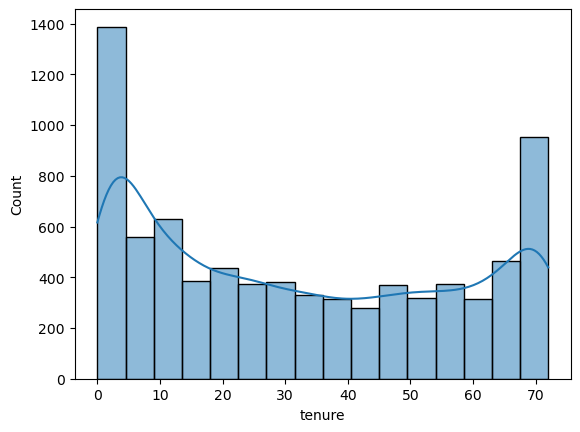

In [10]:
data.tenure.nunique() 
# 73 uniques 
sns.histplot(data   = data,
             x      = 'tenure',
             kde    = True)

# tenure could be very important to predict churn, logically speaking
# 62 Nulls 
# Replace with mean
data['tenure'] = (data['tenure']
                            .fillna(data['tenure']
                                    .mean()))
# Nulls dealt with
data.info() 

In [11]:
data.PhoneService.value_counts()
# Yes    7121 --> ~90%
# No      760 --> ~10%
# Chose to replace by proportion
# Same as before 
def PHONE(row):
    if pd.isna(row['PhoneService']):
        return np.random.choice(['Yes', 'No'], p=[0.9, 0.1])
    else:
        return row['PhoneService']

# Apply the function
data['PhoneService'] = data.apply(PHONE, axis=1)
data.PhoneService.value_counts()
# Yes    7165 --> 90%
# No      769 --> 10%
# Nulls dealt with

# rename the collumn to has_phoneservice
data = data.rename(columns={'PhoneService': 'has_phoneservice'})

# convert all "Yes" to 1 and "No" to 0 (boolean)
data['has_phoneservice'] = data['has_phoneservice'].map({'Yes': True, 'No': False})

In [12]:
data.PaperlessBilling.value_counts()
# Yes    4680 --> ~59%
# No     3207 --> ~41%
# replace by proportion
# Same as before 
def BILLING(row):
    if pd.isna(row['PaperlessBilling']):
        return np.random.choice(['Yes', 'No'], p=[0.59, 0.41])
    else:
        return row['PaperlessBilling']

# Apply the function
data['PaperlessBilling'] = data.apply(BILLING, axis=1)
data.PaperlessBilling.value_counts()
# Yes    4705 --> 59%
# No     3229 --> 41%
# Nulls dealt with

# convert all "Yes" to 1 and "No" to 0 (boolean)
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': True, 'No': False})

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7934 entries, 0 to 7999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   is_male           7934 non-null   bool   
 1   is_senior         7934 non-null   bool   
 2   has_partner       7934 non-null   bool   
 3   tenure            7934 non-null   float64
 4   has_phoneservice  7934 non-null   bool   
 5   MultipleLines     7867 non-null   object 
 6   InternetService   7881 non-null   object 
 7   OnlineSecurity    7875 non-null   object 
 8   OnlineBackup      7894 non-null   object 
 9   DeviceProtection  7887 non-null   object 
 10  TechSupport       7888 non-null   object 
 11  StreamingTV       7884 non-null   object 
 12  StreamingMovies   7882 non-null   object 
 13  Contract          7886 non-null   object 
 14  PaperlessBilling  7934 non-null   bool   
 15  TotalCharges      7895 non-null   object 
 16  Churn             7934 non-null   bool   


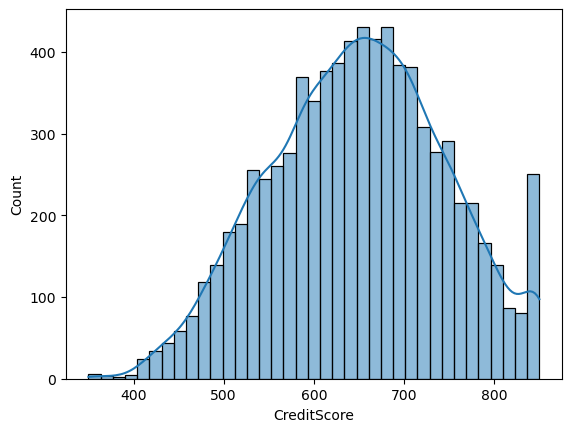

In [13]:
sns.histplot(data   = data,
             x      = 'CreditScore',
             kde    = True)
# 62 Nulls 
# Replace with median
data['CreditScore'] = (data['CreditScore']
                             .fillna(data['tenure']
                                     .median()))
# # Nulls dealt with
data.info() 

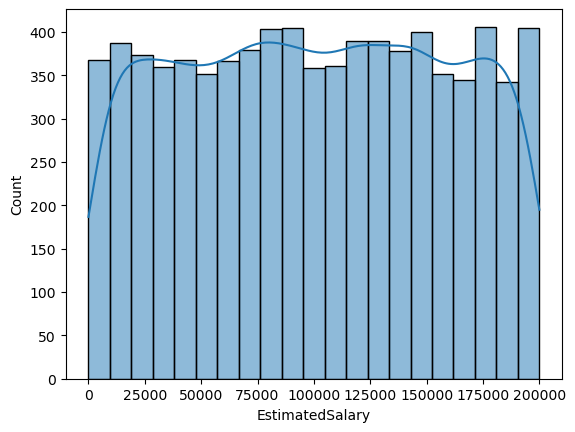

In [14]:
sns.histplot(data   = data,
             x      = 'EstimatedSalary',
             kde    = True)

# 49 nulls
# Replace with mean
data['EstimatedSalary'] = (data['EstimatedSalary']
                             .fillna(data['EstimatedSalary']
                                     .mean()))
# nulls dealt with

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7934 entries, 0 to 7999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   is_male           7934 non-null   bool   
 1   is_senior         7934 non-null   bool   
 2   has_partner       7934 non-null   bool   
 3   tenure            7934 non-null   float64
 4   has_phoneservice  7934 non-null   bool   
 5   MultipleLines     7867 non-null   object 
 6   InternetService   7881 non-null   object 
 7   OnlineSecurity    7875 non-null   object 
 8   OnlineBackup      7894 non-null   object 
 9   DeviceProtection  7887 non-null   object 
 10  TechSupport       7888 non-null   object 
 11  StreamingTV       7884 non-null   object 
 12  StreamingMovies   7882 non-null   object 
 13  Contract          7886 non-null   object 
 14  PaperlessBilling  7934 non-null   bool   
 15  TotalCharges      7895 non-null   object 
 16  Churn             7934 non-null   bool   


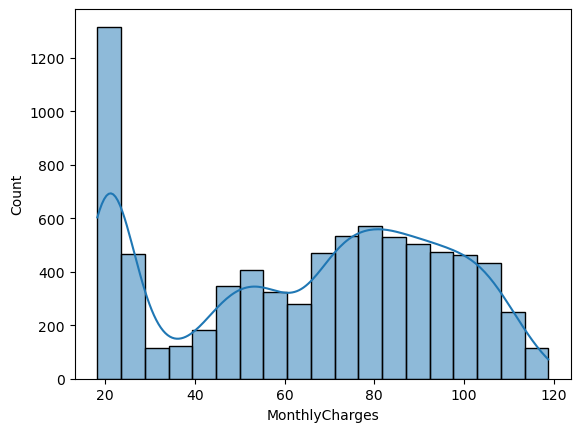

In [15]:
sns.histplot(data   = data,
             x      = 'MonthlyCharges',
             kde    = True)
# 32 nulls
# Replace with median
data['MonthlyCharges'] = (data['MonthlyCharges']
                             .fillna(data['MonthlyCharges']
                                     .median()))
# nulls dealt with
data.info()

In [16]:
data.Dependents.value_counts() # no nulls

# rename the collumn to is_dependent
data = data.rename(columns={'Dependents': 'is_dependent'})

# convert all "Yes" to 1 and "No" to 0 (boolean)
data['is_dependent'] = data['is_dependent'].map({'Yes': True, 'No': False})

In [17]:
data.PaymentMethod.value_counts() # no nulls

# rename the collumn to is_automatic
data = data.rename(columns={'PaymentMethod': 'is_payed_automatic'})

# convert all "Yes" to 1 and "No" to 0 (boolean)
data['is_payed_automatic'] = data['is_payed_automatic'].map({'Bank transfer (automatic)': True,
                                                             'Credit card (automatic)': True,
                                                             'Electronic check': False,
                                                             'Mailed check': False})

In [18]:
data.TotalCharges # weirdly an object datatype, might have to replace with mean and then use to_numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = (data['TotalCharges']
                             .fillna(data['TotalCharges']
                                     .mean())) # fill nan with mean
data.isnull().sum(axis = 0)
data.info() # nulls dealt with

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7934 entries, 0 to 7999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   is_male             7934 non-null   bool   
 1   is_senior           7934 non-null   bool   
 2   has_partner         7934 non-null   bool   
 3   tenure              7934 non-null   float64
 4   has_phoneservice    7934 non-null   bool   
 5   MultipleLines       7867 non-null   object 
 6   InternetService     7881 non-null   object 
 7   OnlineSecurity      7875 non-null   object 
 8   OnlineBackup        7894 non-null   object 
 9   DeviceProtection    7887 non-null   object 
 10  TechSupport         7888 non-null   object 
 11  StreamingTV         7884 non-null   object 
 12  StreamingMovies     7882 non-null   object 
 13  Contract            7886 non-null   object 
 14  PaperlessBilling    7934 non-null   bool   
 15  TotalCharges        7934 non-null   float64
 16  Churn 

## Correlation 

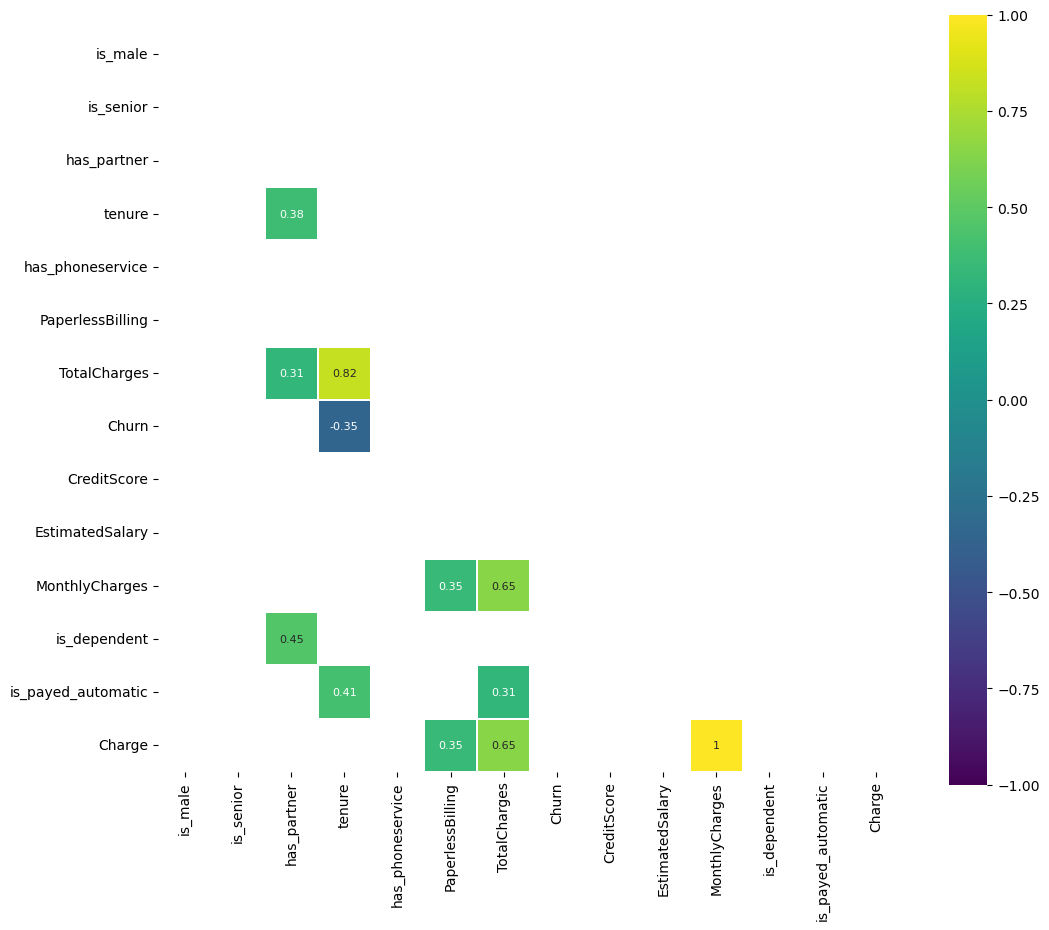

In [19]:
corr = data.corr()
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Only show the strong correlations
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)],
            cmap='viridis',
            mask=mask,
            vmax=1.0,
            vmin=-1.0,
            linewidths=0.1,
            annot=True,
            annot_kws={"size": 8},
            square=True);

# Prediction Model

In [20]:
data.info()
data.isnull().sum(axis = 0)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7934 entries, 0 to 7999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   is_male             7934 non-null   bool   
 1   is_senior           7934 non-null   bool   
 2   has_partner         7934 non-null   bool   
 3   tenure              7934 non-null   float64
 4   has_phoneservice    7934 non-null   bool   
 5   MultipleLines       7867 non-null   object 
 6   InternetService     7881 non-null   object 
 7   OnlineSecurity      7875 non-null   object 
 8   OnlineBackup        7894 non-null   object 
 9   DeviceProtection    7887 non-null   object 
 10  TechSupport         7888 non-null   object 
 11  StreamingTV         7884 non-null   object 
 12  StreamingMovies     7882 non-null   object 
 13  Contract            7886 non-null   object 
 14  PaperlessBilling    7934 non-null   bool   
 15  TotalCharges        7934 non-null   float64
 16  Churn 

is_male                0
is_senior              0
has_partner            0
tenure                 0
has_phoneservice       0
MultipleLines         67
InternetService       53
OnlineSecurity        59
OnlineBackup          40
DeviceProtection      47
TechSupport           46
StreamingTV           50
StreamingMovies       52
Contract              48
PaperlessBilling       0
TotalCharges           0
Churn                  0
Geography             51
CreditScore            0
EstimatedSalary        0
MonthlyCharges         0
is_dependent           0
is_payed_automatic     0
Charge                 0
dtype: int64

In [21]:
x_var = ["is_male",
         "is_senior",
         "has_partner",
         "tenure",
         "has_phoneservice",
       #  "MultipleLines",
        # "InternetService",
         #"OnlineSecurity",
         #"OnlineBackup",
        # "DeviceProtection",
     #    "TechSupport",
    #     "StreamingTV",
    #     "StreamingMovies",
      #   "Contract",
         "PaperlessBilling",
         "TotalCharges",
     #    "Geography",
         "CreditScore",
         "EstimatedSalary",
         "MonthlyCharges",
         "is_dependent",
         "is_payed_automatic",
         "Charge"]


In [22]:
# specify exploratory and explanatory variables
y_data = data.loc[ : , 'Churn']
x_data = data.loc[ : , x_var]

# Train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            x_data, 
            y_data, 
            test_size    = 0.25,
            random_state = 0)

# create the model
logreg = LogisticRegression()

# Train the model
logreg.fit(x_train, y_train)

LogisticRegression()

In [23]:
# Predict on testset
y_predicted = logreg.predict(x_test)

In [24]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [25]:
cm = confusion_matrix(y_test, y_predicted)

TN, FP, FN, TP = confusion_matrix(y_test, y_predicted).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  223
False Positive(FP) =  136
True Negative(TN)  =  1316
False Negative(FN) =  309
Accuracy of the binary classification = 0.776


# Model Performance Analysis 

In [26]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

       False       0.81      0.91      0.86      1452
        True       0.62      0.42      0.50       532

    accuracy                           0.78      1984
   macro avg       0.72      0.66      0.68      1984
weighted avg       0.76      0.78      0.76      1984



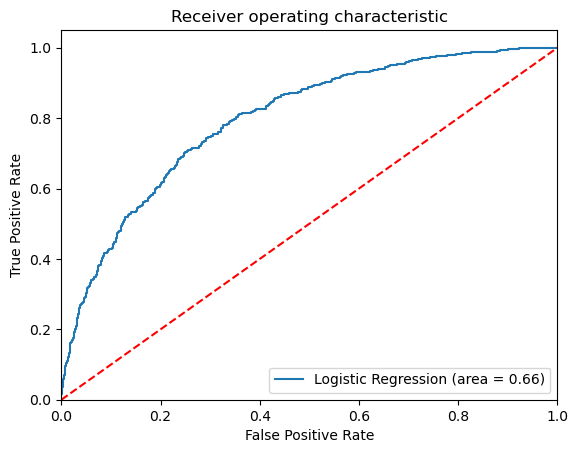

In [27]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Go back to cleaning to add more variables

In [28]:
data.info()
data.isnull().sum(axis = 0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7934 entries, 0 to 7999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   is_male             7934 non-null   bool   
 1   is_senior           7934 non-null   bool   
 2   has_partner         7934 non-null   bool   
 3   tenure              7934 non-null   float64
 4   has_phoneservice    7934 non-null   bool   
 5   MultipleLines       7867 non-null   object 
 6   InternetService     7881 non-null   object 
 7   OnlineSecurity      7875 non-null   object 
 8   OnlineBackup        7894 non-null   object 
 9   DeviceProtection    7887 non-null   object 
 10  TechSupport         7888 non-null   object 
 11  StreamingTV         7884 non-null   object 
 12  StreamingMovies     7882 non-null   object 
 13  Contract            7886 non-null   object 
 14  PaperlessBilling    7934 non-null   bool   
 15  TotalCharges        7934 non-null   float64
 16  Churn 

is_male                0
is_senior              0
has_partner            0
tenure                 0
has_phoneservice       0
MultipleLines         67
InternetService       53
OnlineSecurity        59
OnlineBackup          40
DeviceProtection      47
TechSupport           46
StreamingTV           50
StreamingMovies       52
Contract              48
PaperlessBilling       0
TotalCharges           0
Churn                  0
Geography             51
CreditScore            0
EstimatedSalary        0
MonthlyCharges         0
is_dependent           0
is_payed_automatic     0
Charge                 0
dtype: int64

In [29]:
# Decision to drop the remaining nulls 
data.dropna(how='any',axis=0,inplace=True)
data.isnull().sum(axis = 0)

is_male               0
is_senior             0
has_partner           0
tenure                0
has_phoneservice      0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
TotalCharges          0
Churn                 0
Geography             0
CreditScore           0
EstimatedSalary       0
MonthlyCharges        0
is_dependent          0
is_payed_automatic    0
Charge                0
dtype: int64

In [30]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7432 entries, 0 to 7999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   is_male             7432 non-null   bool   
 1   is_senior           7432 non-null   bool   
 2   has_partner         7432 non-null   bool   
 3   tenure              7432 non-null   float64
 4   has_phoneservice    7432 non-null   bool   
 5   MultipleLines       7432 non-null   object 
 6   InternetService     7432 non-null   object 
 7   OnlineSecurity      7432 non-null   object 
 8   OnlineBackup        7432 non-null   object 
 9   DeviceProtection    7432 non-null   object 
 10  TechSupport         7432 non-null   object 
 11  StreamingTV         7432 non-null   object 
 12  StreamingMovies     7432 non-null   object 
 13  Contract            7432 non-null   object 
 14  PaperlessBilling    7432 non-null   bool   
 15  TotalCharges        7432 non-null   float64
 16  Churn 

## Logistic Model

In [31]:
x_var = ["is_male",
         "is_senior",
         "has_partner",
         "tenure",
         "has_phoneservice",
         "MultipleLines",
         "InternetService",
         "OnlineSecurity",
         "OnlineBackup",
         "DeviceProtection",
         "TechSupport",
         "StreamingTV",
         "StreamingMovies",
         "Contract",
         "PaperlessBilling",
         "TotalCharges",
         "Geography",
         "CreditScore",
         "EstimatedSalary",
         "MonthlyCharges",
         "is_dependent",
         "is_payed_automatic",
         "Charge"]


In [32]:
# Now we convert the remaining object columns to dummies using onehot encoder 

y_data = data.loc[ : , 'Churn']
x_data = data.loc[ : , x_var]

s = (x_data.dtypes == 'object')
object_cols = list(s[s].index)

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(x_data[object_cols]))

# One-hot encoding removed index; put it back
OH_cols.index = x_data.index

# Ensure we have proper column names
OH_cols.set_axis(np.concatenate(OH_encoder.categories_), axis=1, inplace=True)

OH_encoder.get_feature_names()
OH_cols.columns = OH_encoder.get_feature_names()

# Remove categorical columns (will replace with one-hot encoding)
num_X = x_data.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, OH_cols], axis=1)


OH_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7432 entries, 0 to 7999
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   is_male                 7432 non-null   bool   
 1   is_senior               7432 non-null   bool   
 2   has_partner             7432 non-null   bool   
 3   tenure                  7432 non-null   float64
 4   has_phoneservice        7432 non-null   bool   
 5   PaperlessBilling        7432 non-null   bool   
 6   TotalCharges            7432 non-null   float64
 7   CreditScore             7432 non-null   float64
 8   EstimatedSalary         7432 non-null   float64
 9   MonthlyCharges          7432 non-null   float64
 10  is_dependent            7432 non-null   bool   
 11  is_payed_automatic      7432 non-null   bool   
 12  Charge                  7432 non-null   float64
 13  x0_No                   7432 non-null   float64
 14  x0_No phone service     7432 non-null   

/Users/fernandogamboa/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
# Rename the columns 
column_names = {
    'x0_No': 'MultipleLines_No',
    'x0_No phone service': 'MultipleLines_No_phone_service',
    'x0_Yes': 'MultipleLines_Yes',
    'x1_DSL': 'InternetService_DSL',
    'x1_Fiber optic': 'InternetService_Fiber_optic',
    'x1_No': 'InternetService_No',
    'x2_No': 'OnlineSecurity_No',
    'x2_No internet service': 'OnlineSecurity_No_internet_service',
    'x2_Yes': 'OnlineSecurity_Yes',
    'x3_No': 'OnlineBackup_No',
    'x3_No internet service': 'OnlineBackup_No_internet_service',
    'x3_Yes': 'OnlineBackup_Yes',
    'x4_No': 'DeviceProtection_No',
    'x4_No internet service': 'DeviceProtection_No_internet_service',
    'x4_Yes': 'DeviceProtection_Yes',
    'x5_No': 'TechSupport_No',
    'x5_No internet service': 'TechSupport_No_internet_service',
    'x5_Yes': 'TechSupport_Yes',
    'x6_No': 'StreamingTV_No',
    'x6_No internet service': 'StreamingTV_No_internet_service',
    'x6_Yes': 'StreamingTV_Yes',
    'x7_No': 'StreamingMovies_No',
    'x7_No internet service': 'StreamingMovies_No_internet_service',
    'x7_Yes': 'StreamingMovies_Yes',
    'x8_Month-to-month': 'Contract_Month_to_Month',
    'x8_One year': 'Contract_One_Year',
    'x8_Two year': 'Contract_Two_Years',
    'x9_France': 'Geography_France',
    'x9_Germany': 'Geography_Germany',
    'x9_Spain': 'Geography_Spain'
}

OH_X = OH_X.rename(columns=column_names)

In [34]:
## Logistic Model after Onehotencoder

In [35]:
# Retrain the model with more x variables after Onehotencoding
y_data = data.loc[ : , 'Churn']
x_data = OH_X

x_train, x_test, y_train, y_test = train_test_split(
            OH_X, 
            y_data, 
            test_size    = 0.25,
            random_state = 1)

# create the model
logreg = LogisticRegression()

# Train the model
logreg.fit(x_train, y_train)

# Predict
y_predicted = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [36]:
print(classification_report(y_test, y_predicted))
# The model is undertrained for "True" --> use smoat

              precision    recall  f1-score   support

       False       0.82      0.90      0.86      1383
        True       0.59      0.44      0.50       475

    accuracy                           0.78      1858
   macro avg       0.71      0.67      0.68      1858
weighted avg       0.76      0.78      0.77      1858



## Using SMOTE

In [37]:
smoat = SMOTE(random_state=50)
x_train, y_train = smoat.fit_resample(x_train, y_train) # rebalance the dataset 

# create the model
logreg = LogisticRegression()
# Train the model
logreg.fit(x_train, y_train)

# Predict
y_predicted = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))



Accuracy of logistic regression classifier on test set: 0.72


In [38]:
cm = confusion_matrix(y_test, y_predicted)

TN, FP, FN, TP = confusion_matrix(y_test, y_predicted).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  357
False Positive(FP) =  400
True Negative(TN)  =  983
False Negative(FN) =  118
Accuracy of the binary classification = 0.721


In [39]:
print(classification_report(y_test, y_predicted))
# model is still not above .80
# Try other methods

              precision    recall  f1-score   support

       False       0.89      0.71      0.79      1383
        True       0.47      0.75      0.58       475

    accuracy                           0.72      1858
   macro avg       0.68      0.73      0.69      1858
weighted avg       0.79      0.72      0.74      1858



## Random Forest Model

In [40]:

# create a new model using random forest
randforest = RandomForestClassifier()

# Train the model
randforest.fit(x_train, y_train)

# Predict
y_predicted = randforest.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(randforest.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [41]:
cm = confusion_matrix(y_test, y_predicted)

TN, FP, FN, TP = confusion_matrix(y_test, y_predicted).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  303
False Positive(FP) =  128
True Negative(TN)  =  1255
False Negative(FN) =  172
Accuracy of the binary classification = 0.839


In [42]:
print(classification_report(y_test, y_predicted)) # Nice model, using Random Forest improved it by a lot


              precision    recall  f1-score   support

       False       0.88      0.91      0.89      1383
        True       0.70      0.64      0.67       475

    accuracy                           0.84      1858
   macro avg       0.79      0.77      0.78      1858
weighted avg       0.83      0.84      0.84      1858



In [43]:
randforest.feature_importances_ # since we are using random forest we cannot do the same feature importance analysis as for regression types


array([0.01033596, 0.01103442, 0.0095094 , 0.06865474, 0.00185649,
       0.02143779, 0.07404351, 0.04860541, 0.05268428, 0.05132984,
       0.00827595, 0.00971342, 0.05357739, 0.00957049, 0.00381605,
       0.00906886, 0.02202923, 0.050732  , 0.00356999, 0.06262277,
       0.0069423 , 0.01829224, 0.0252382 , 0.00560194, 0.01405958,
       0.03240342, 0.00594106, 0.0117663 , 0.06082559, 0.00390017,
       0.01947323, 0.01200169, 0.0044397 , 0.01009674, 0.01045982,
       0.00433134, 0.00888344, 0.07953074, 0.01760258, 0.03270397,
       0.01183423, 0.01024734, 0.0109564 ])

# Feature Importance 

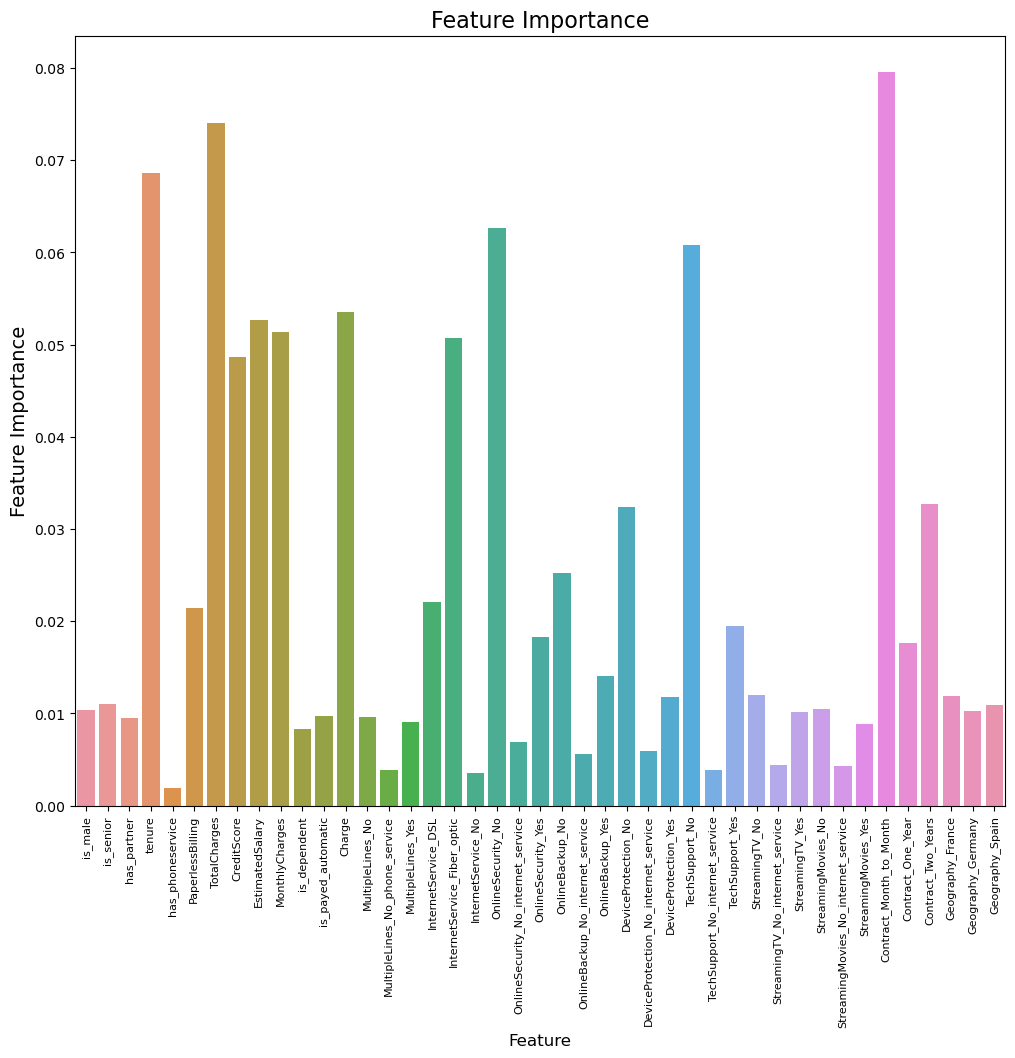

In [44]:
# Make a chart based on the output array 
# since the collumns from OH_X have the same order and lengh, we dont need to create a new dataframe
fig, ax = plt.subplots(figsize=(12, 10))

# visualizing the feature_importances for analysis
sns.barplot(x=OH_X.columns, y=randforest.feature_importances_, ax=ax)

# labeling
ax.set_ylabel('Feature Importance', fontsize=14)
ax.set_xlabel('Feature', fontsize=12)
ax.set_title('Feature Importance', fontsize=16)
plt.xticks(rotation=90, fontsize= 8)

plt.show()

# Change the model from Randomforest to GradientBoosting

In [45]:
# Trying to further improve the model using hyperparameters and Gradient Boosting instead of Random forest

# change the datatypes to int & declare variables
OH_X = OH_X.astype(int) 
y_data = data.loc[ : , 'Churn']
x_data = OH_X
y_data= y_data.astype(int)

# Train-test split 
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.3,
            random_state = 101,
            stratify     = y_data)    

# SMOTE creates synthetic data for the minority class 
smote = SMOTE(random_state=0)
x_train_new, y_train_new = smote.fit_resample(x_train, y_train)


# Define Hyperparameters
# n_estimators hyperparameter --> the number of decision trees 
# max_depth determines the maximum depth of each decision tree
# learning_rate is a factor applied to the learning contribution of each tree in the model
# warm_start if set to True, the previous fit of the model will be used to warm-start the current fit

param_grid = {'n_estimators'     : np.arange(120, 150, 10),
              'max_depth'        : np.arange(3, 5, 1),
              'learning_rate'    : np.arange(0.1, 3.0, 0.1),
              'warm_start'       : [True]} 


# create "normal" GradientBoostingClassifier model to test best params 
gradient = GradientBoostingClassifier(random_state = 101)

# RandomizedSearchCV function to perform hyperparameter tuning
# perform randomized search over the parameters defined
# using cross-validation with a 3-fold split
# n_iter declares the number of iterations -- 10 different random combinations of hyperparameters will be tested
gradientboost = RandomizedSearchCV(estimator            = gradient,  
                                    param_distributions = param_grid,
                                    cv                  = 3,
                                    n_iter              = 10,
                                    random_state        = 101)


gradientboost.fit(x_data, y_data) # Fit the data to the model

# save the best estimator found by RandomizedSearchCV to tunedgradientboost
tunedgradientboost = gradientboost.best_estimator_

# Fit the data again using the balanced data that we created using smote 
tunedgradientboost = tunedgradientboost.fit(x_train_new, y_train_new)


# Predict the y variable using x_test
y_predicted = tunedgradientboost.predict(x_test)

# This is the best model i could find in terms for performance. 

In [46]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1640
           1       0.95      0.89      0.92       590

    accuracy                           0.96      2230
   macro avg       0.96      0.94      0.95      2230
weighted avg       0.96      0.96      0.96      2230



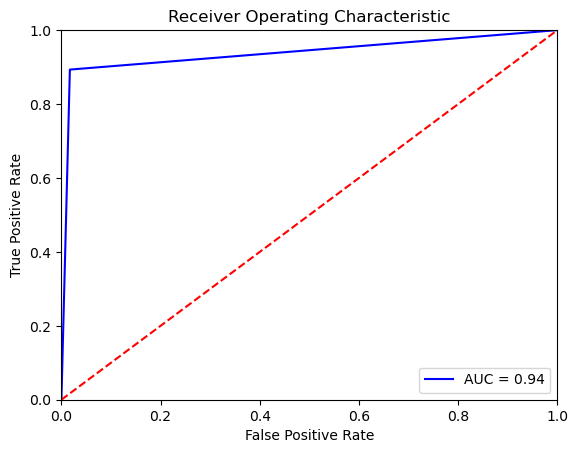

In [47]:
# Calculate the FPR and TPR for all thresholds of the classification
probs = tunedgradientboost.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/Users/fernandogamboa/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 640x480 with 0 Axes>

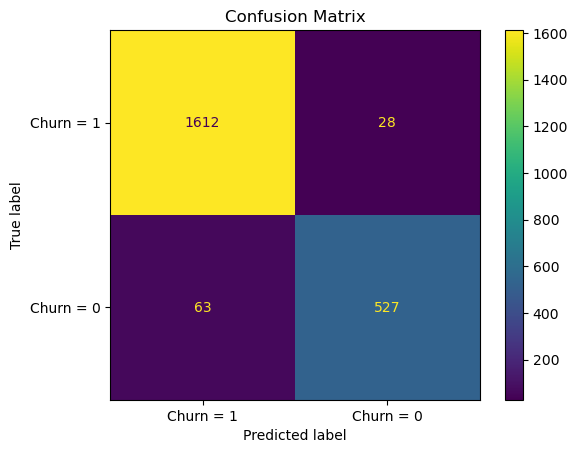

In [48]:
# Plot Confusion Matrix

# Unpack confusion matrix
tunedgradientboost_tn, \
tunedgradientboost_fp, \
tunedgradientboost_fn, \
tunedgradientboost_tp = confusion_matrix(y_true = y_test, y_pred = y_predicted).ravel()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted, labels=[1,0])
np.set_printoptions(precision = 2)

# Plot non-normalized confusion matrix
plt.figure()

plot_confusion_matrix(tunedgradientboost, x_test, y_test, display_labels=['Churn = 1', 'Churn = 0'], normalize=None)

plt.title('Confusion Matrix')
plt.show()


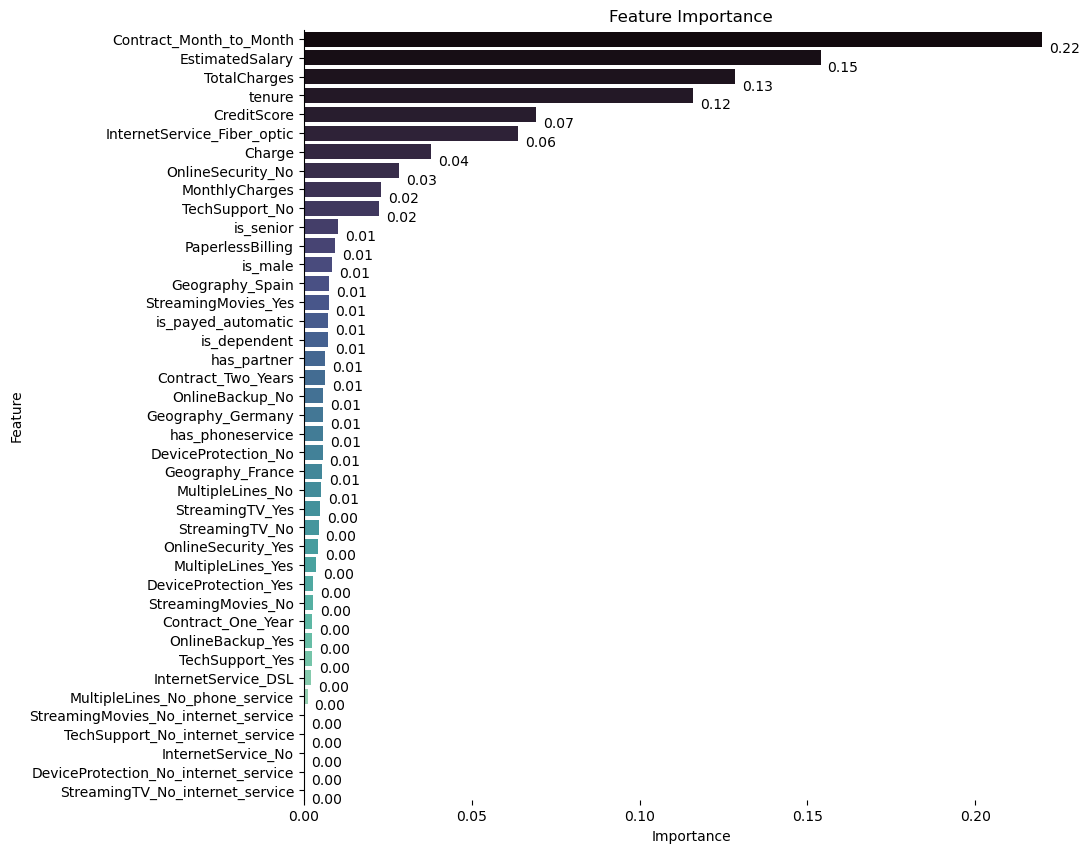

In [49]:
# Plot feature importance

# Create a dataframe of feature importance
feature_imp = pd.DataFrame(tunedgradientboost.feature_importances_, x_data.columns, columns=['Importance'])

# Filter out importance levels that equal 0 and sort by descending
feature_imp = feature_imp[feature_imp['Importance'] != 0]\
                            .sort_values('Importance', ascending = False)

# Plot

fig, ax = plt.subplots(figsize = (10, 10))

ax = sns.barplot(data    = feature_imp,
                 x       = 'Importance',
                 y       = feature_imp.index,
                 orient  = 'h',
                 palette = 'mako')

for p in ax.patches:    
    ax.annotate("%.2f" % p.get_width(), 
                   (p.get_x() + p.get_width(), 
                    p.get_y()), 
                    xytext=(5, -15), 
                    textcoords='offset points')


ax.set_yticks(np.arange(len(feature_imp)))
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.show()

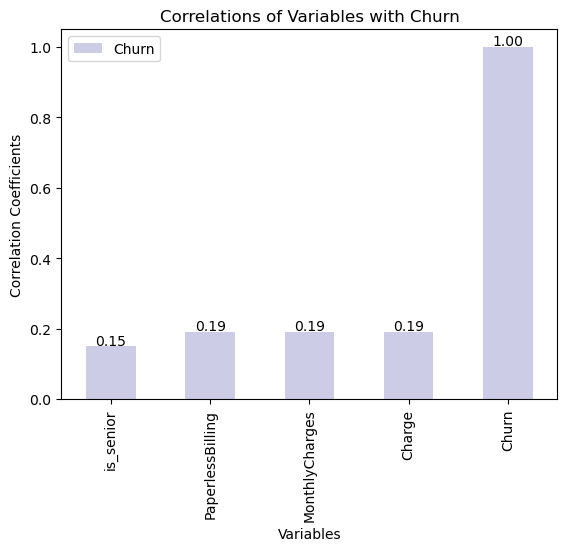

In [50]:
# Plot negative correlation coefficients of "Churn" with other variables:

# Create correlation dataframe and sort                    
corr = pd.DataFrame(data.corr()['Churn'].sort_values()).round(2)

# Filter for negative correlations
corr = corr[corr['Churn'] > 0.1]

# Plot bar plot
ax = corr.plot(kind='bar', color='darkblue', alpha=0.2)

ax.set_title('Correlations of Variables with Churn')
ax.set_xlabel('Variables')
ax.set_ylabel('Correlation Coefficients')

# Annotate plot with values
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 4),
                textcoords='offset points')

plt.show()

# Business Findings and Recommendations 
## Findings and recommendations

For the enterprise's findings, the model shows that the predictors that most heavily can explain the behaviour for the customers that stop doing business with the company fall between the categories of age (senior), monthly charges, paperless bill and total charges. 

- All variables in the prediction model can accurately explain 75% which customers are likely to stop doing business with the enterprise.

- The feature importance chart shows that Monthly Contracts, Online Security, Tenure, and Tech Support; help the prediction model understand the customer behaviour behind the Churn indicator. 

- The variables that negatively impact customer retention are tenure, automatic payment, and total charges. 

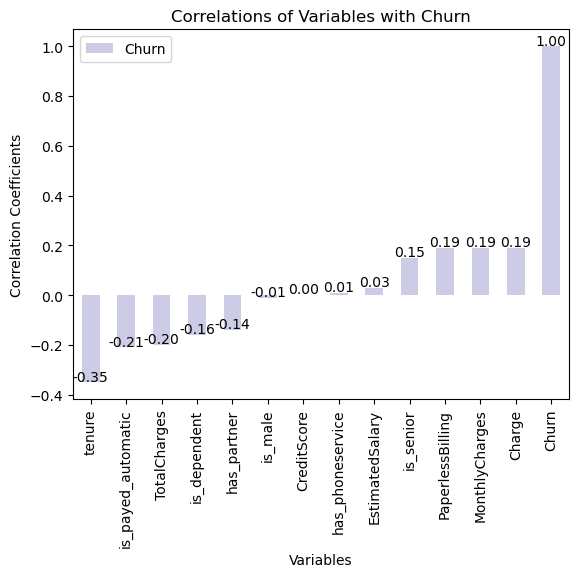

In [51]:
# Plot negative correlation coefficients of "CROSS_SELL_SUCCESS" with other variables:

# Create correlation dataframe and sort                    
corr = pd.DataFrame(data.corr()['Churn'].sort_values()).round(2)



# Plot bar plot
ax = corr.plot(kind='bar', color='darkblue', alpha=0.2)

ax.set_title('Correlations of Variables with Churn')
ax.set_xlabel('Variables')
ax.set_ylabel('Correlation Coefficients')

# Annotate plot with values
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 4),
                textcoords='offset points')

plt.show()

## Engaging senior customers   

The impact of age on customer churn is a factor that requires closer analysis. As customers grow older, they become increasingly inclined to discontinue their business with the company, and this trend may be attributed to certain business practices. Specifically, “Senior” and “Paperless billing” variables have a positive correlation with churn rates, as older individuals may lean toward a preference for traditional modes of communication and may perceive a lack of engagement when presented with digital billing options. 

#### Recommendation

To address this issue, it is recommended that the company develops targeted strategies aimed at engaging with its older customers, such as providing more detailed billing statements, enhancing the accessibility of customer service, and offering senior discounts. These initiatives are likely to increase senior customer engagement and, as result, prolong customer retention.


## Increase Tenure 

Tenure is negatively correletated to churn, indicating that the longer the customers have been doing business with the company, the less likely for them to leave. 

#### Recommendation


Offer loyalty programs with exclusive benefits: Create a loyalty program specifically for long-term customers that offers exclusive benefits and rewards. For example, offer them access to premium features, faster customer service response times, or early access to new products or services. By making your long-term customers feel valued and appreciated, you can increase their loyalty and make it more difficult for them to switch to a competitor.
Additionally, you could consider creating tiers within your loyalty program, where customers can unlock more benefits as they continue to use your service over time. This can incentivize long-term use and reward customers for their loyalty.

Remember to communicate the benefits of your loyalty program to your long-term customers clearly and regularly. Make it easy for them to understand how they can take advantage of these exclusive benefits, and consider promoting the program through targeted email campaigns, social media posts, and other marketing efforts.



<AxesSubplot:xlabel='tenure', ylabel='Count'>

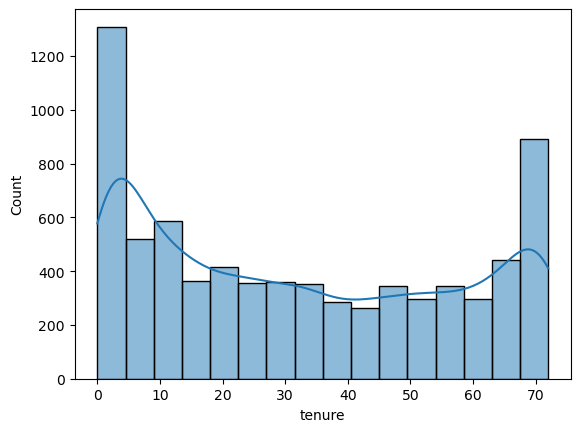

In [54]:
sns.histplot(data   = data,
             x      = 'tenure',
             kde    = True)

## Automatic Payments and Tech Support 

The use of automatic payments has a negative correlation with churn, indicating that customers who are enrolled in autopay are more likely to continue their business with the company.

This behavior may be explained by the convenience of automatic payments, which simplifies the payment process for customers while ensuring that the company receives payment on time. On the other hand, by avoiding the step of the customer paying by himself, there is less likelihood for him to leave as they are not reminded of the recurring costs.



#### Recommendation

It is worth noting that certain age demographics may find these technologies difficult to navigate. To mitigate this, the company must invest in its customer service and support departments to assist customers in need. It was discovered that a significant number of customers reported unsatisfactory experiences with customer support, which potentially contribute to customer disengagement, making them more likely to look for other options.

One step could be to increase awareness of tech support through multiple channels to make sure that customers are aware of the availability of tech support whenever they need it.

An additional measure could be to deploy a smart assistant, that is accessible around-the-clock to help customers troubleshoot common technical problems. The smart assistant can use artificial intelligence to understand customer inquiries and provide relevant solutions quickly.








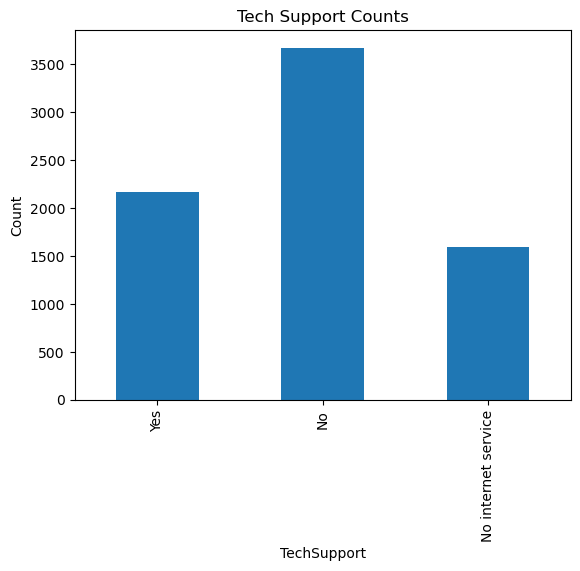

In [55]:
# Create a new dataframe with value counts of TechSupport
techsupport_counts = pd.DataFrame(data['TechSupport'].value_counts())

techsupport_counts = techsupport_counts.reindex(index=['Yes', 'No', 'No internet service'])

techsupport_counts.plot(kind='bar', legend=None)

plt.xlabel('TechSupport')
plt.ylabel('Count')
plt.title('Tech Support Counts')

# Display the chart
plt.show()